In [4]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
import simulation as sm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [5]:
params = {'legend.fontsize': 13,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

In [6]:
sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07', 'M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
                 'Illustris', 'BolshoiP', 'Bolshoi', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
                 'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8',
                 'm35s8', 'm25s9', 'm35s85', 'm3s75', 'm35s9', 'm35s7']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2, 0.3
    , 0.3, 0.35, 0.4, 0.3, 0.25, 0.2, 0.3, 0.3, 0.2, 0.25, 0.35, 0.25, 0.35, 0.3, 0.35, 0.35]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
    , 0.8, 0.75, 0.9, 0.9, 0.75, 1.0, 0.7, 0.85, 0.7, 0.8, 0.8, 0.9, 0.85, 0.75, 0.9, 0.7]

sims = dict(zip(sim_names, list(zip(omegas, sigmas))))

# Average Growth

## One simulation : test

Text(0.5, 0, 'M [M$_\\odot$/h]')

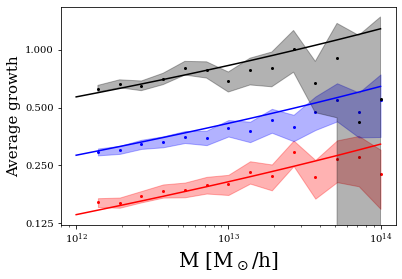

In [13]:
zfs = [0.05, 0.55, 1.5]
nbins = 15
masses = np.logspace(12, 14, nbins)
colors = ['red', 'blue', 'black']
sim_name = 'Bolshoi'
path = '/home/painchess/YubaHDD6T/oldsims/'

simtest = sm.Simulation(sim_name, sims[sim_name][0], sims[sim_name][1], path=path)

om = simtest.om0
s8 = simtest.sig8
for k in range(len(zfs)):
    zf = zfs[k]
    res_sim, ntot_sim, ps_sim = simtest.average_growth(zf, mbins=15)
    zs, dz = sm.get_zlastdyn(zf, om=om, h=0.7, zbins=20)
    res1_ana = sm.average_growth_analytical(masses, zs, s8=s8, om=om)
    plt.plot(masses, res1_ana, color=colors[k], label='z = {:1.2f} Analytical'.format(zf))
    plt.fill_between(masses[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:], color = colors[k],  alpha=0.3)

    plt.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], s=4, color=colors[k])
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, numticks=10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=2, numticks=10))

plt.ylabel('Average growth', size=15)
plt.xlabel(r'M [M$_\odot$/h]', size=20)


## All simulations

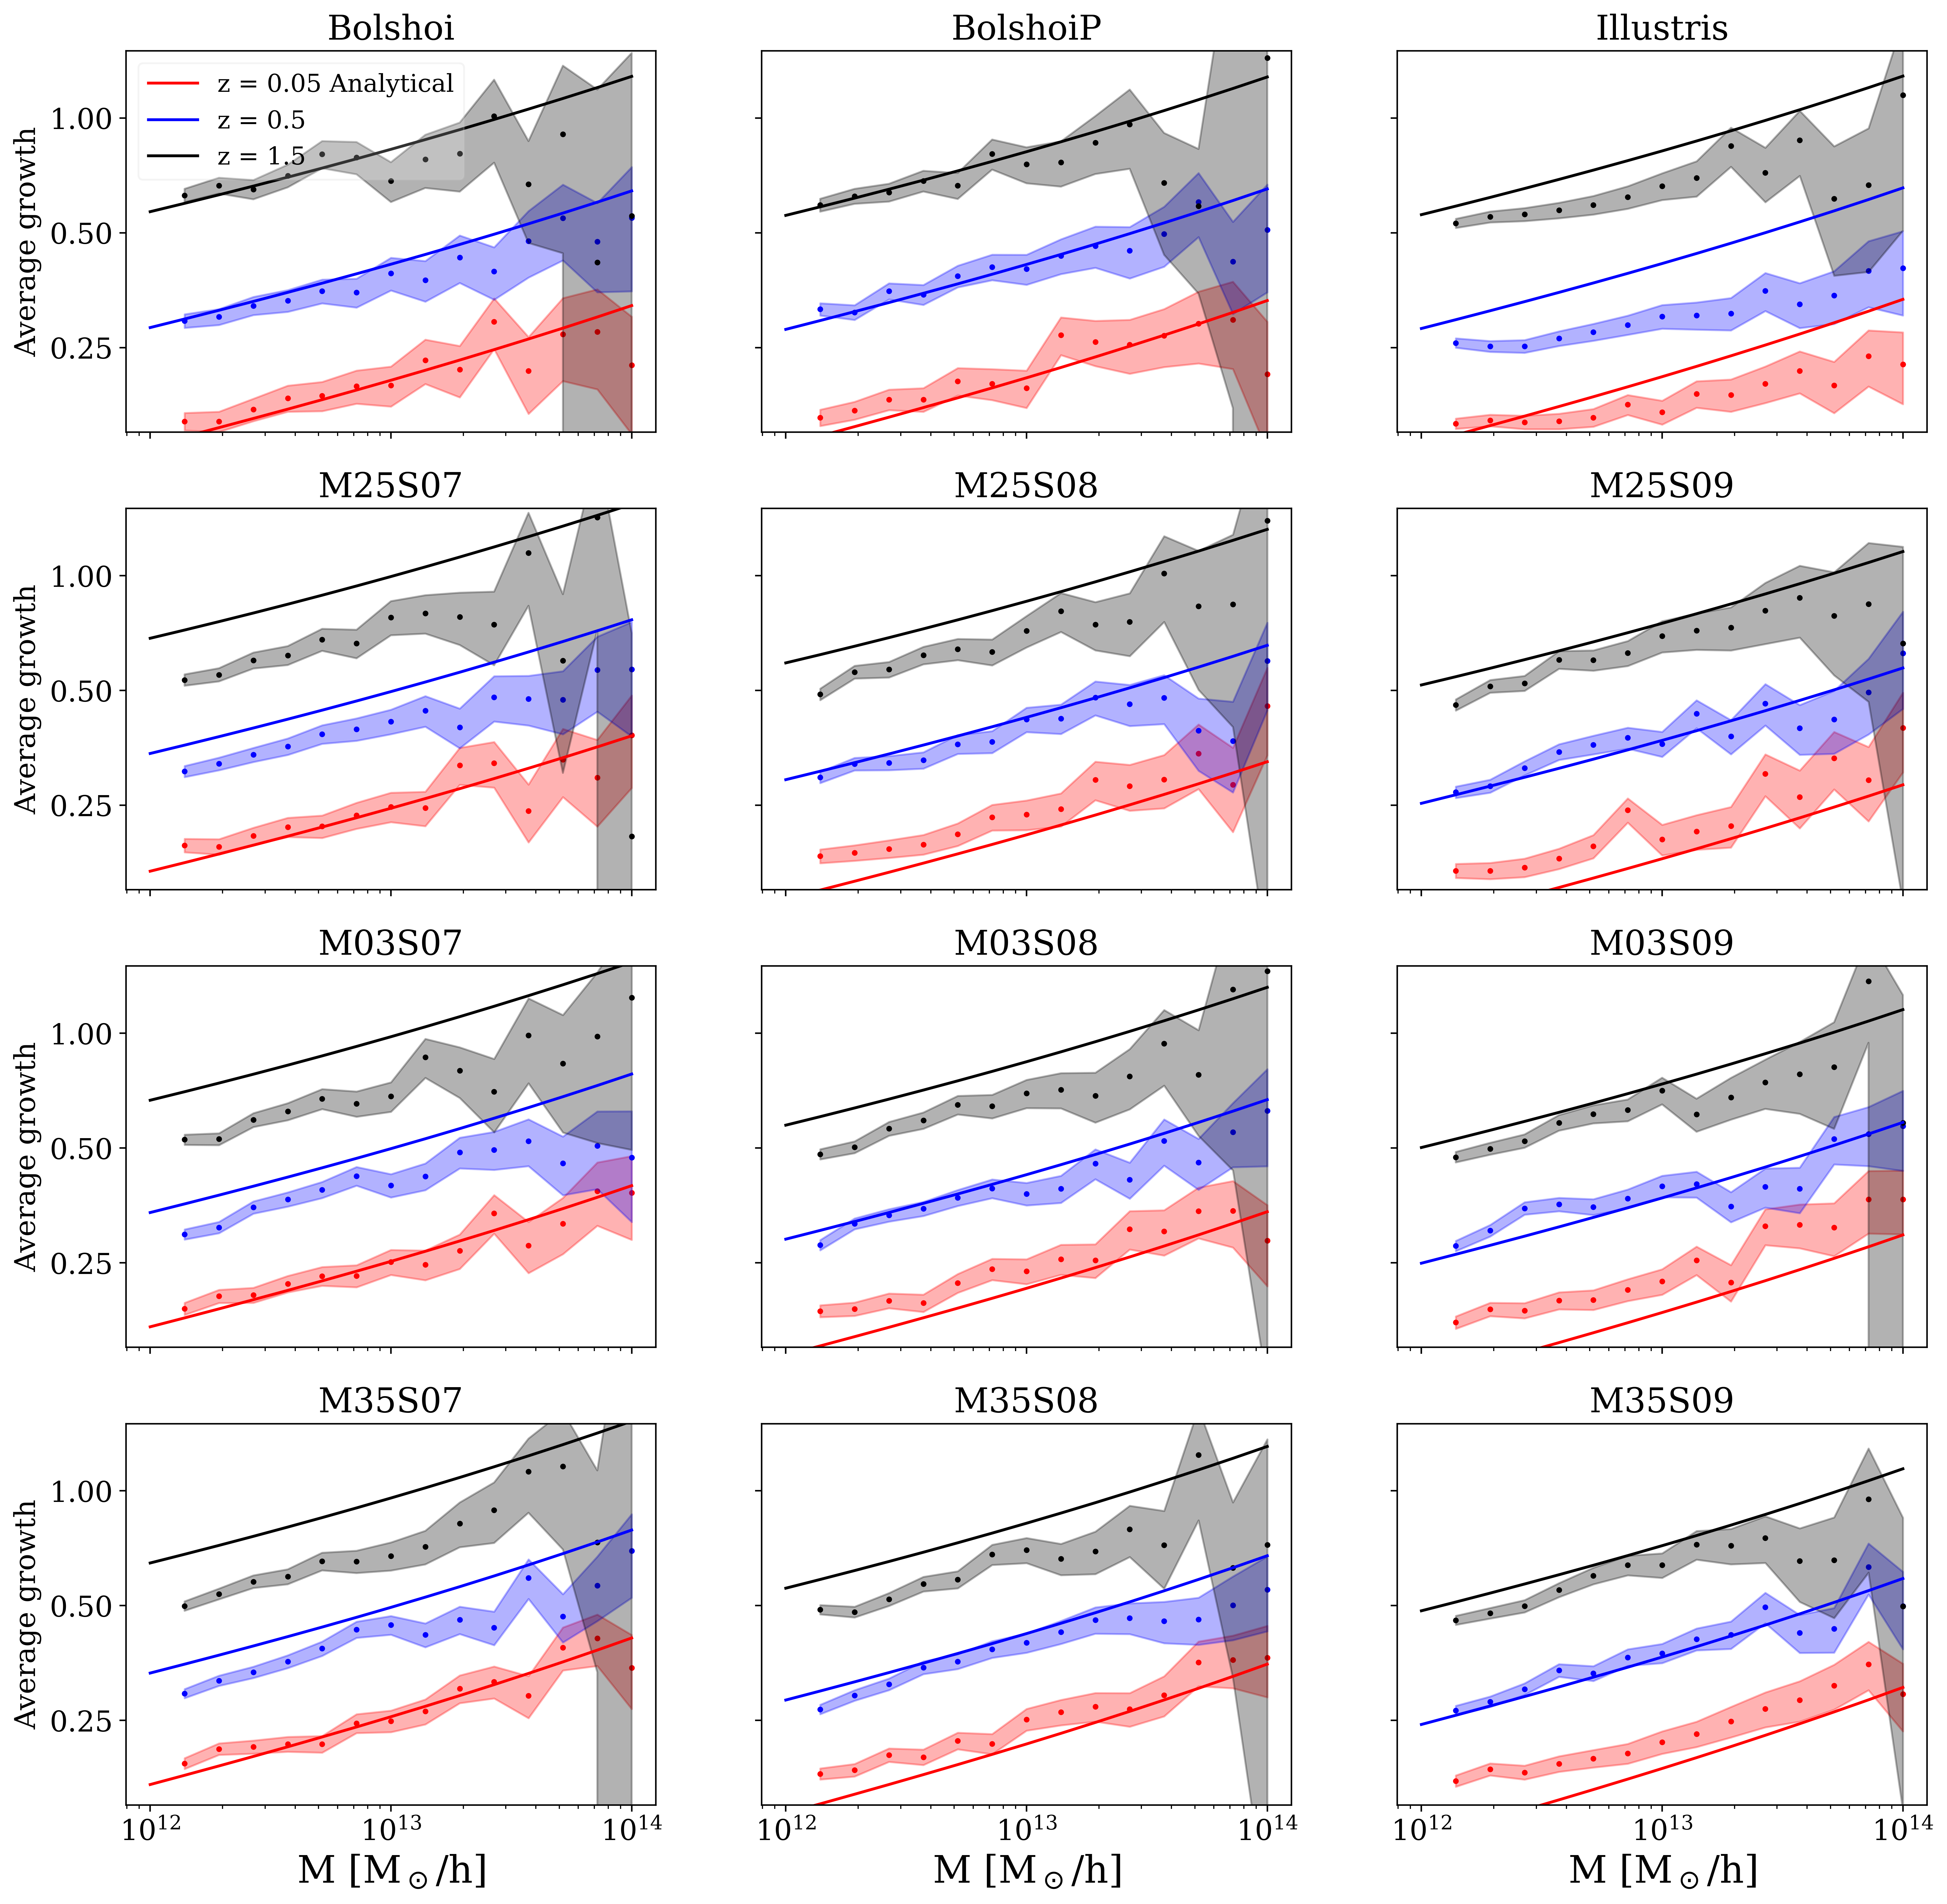

In [8]:
zfs = [0.05, 0.55, 1.5]
nbins = 15
masses = np.logspace(12, 14, nbins)
simnames = ['Bolshoi','BolshoiP','Illustris', 'M25S07', 'M25S08', 'M25S09','M03S07','M03S08','M03S09', 'M35S07', 'M35S08','M35S09']
colors = ['red', 'blue', 'black']
path = '/home/painchess/YubaHDD6T/oldsims/'
fig, axs = plt.subplots(4, 3,  figsize=[17, 17], dpi=500, sharex=True, sharey=True)
save = False
resplot1, resplot2 = [], []
for i in range(len(simnames)):
    sim = simnames[i]
    simt = sm.Simulation(sim, sims[sim][0], sims[sim][1], path)
    ax = axs[i // 3, i % 3]
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    for k in range(len(zfs)):
        zf = zfs[k]
        res_sim, ntot_sim, ps_sim = simt.average_growth(zf, mbins=15, save=False)
        zs, dz = sm.get_zlastdyn(zf, h=0.7, om=simt.om0, zbins=20)
        res1_ana = sm.average_growth_analytical(masses, zs, s8=simt.sig8, om=simt.om0)

        resplot1.append([masses, res1_ana])
        resplot2.append([masses[1:], res_sim[1:]/ntot_sim[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:]])

        if zf == 0.05:
            ax.plot(masses, res1_ana, color=colors[k], label='z = {:1.2f} Analytical'.format(zf)[:19*(i==0)])
            #ax.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], s=4, color=colors[k], label=' {}'.format(prefixes[sim]))
            ax.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], s=4, color=colors[k])
            ax.fill_between(masses[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:], color = colors[k],  alpha=0.3)
            #ax.text(8e12, 0.92, sim, size=20)
            ax.set_title(sim, size=18)
        else:
            ax.plot(masses, res1_ana, color=colors[k], label='z = {:1.2f}'.format(zf)[:7*(i==0)])
            ax.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], color=colors[k], s=4)
            ax.fill_between(masses[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:], color = colors[k], alpha=0.3)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if i>8:
        ax.set_xlabel(r'M [M$_\odot$/h]', size=20)
    ax.set_ylim(0.15, 1.5)
    ax.set_ylabel('Average growth'[:23*(i%3 == 0)], size=15)

axs[0,0].legend(framealpha=0.2)

ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%1.2f'))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, numticks=10))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))

ax.yaxis.set_major_locator(ticker.LogLocator(base=2, numticks=10))

np.save('./data/resplot1_fig_naverage_growth_vs_M_wsims_all_nbins{}.npy'.format(nbins), np.array(resplot1, dtype=object))
np.save('./data/resplot2_fig_naverage_growth_vs_M_wsims_all_nbins{}.npy'.format(nbins), np.array(resplot2, dtype=object))
    
plt.savefig('./figs/lognaverage_growth_vs_M_wsims_all_nbins_{}.pdf'.format(nbins), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.savefig('./figs/lognaverage_growth_vs_M_wsims_all_nbins_{}.png'.format(nbins), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)


# Large growth 

## One simulation

Text(0.5, 0, 'M [M$_\\odot$/h]')

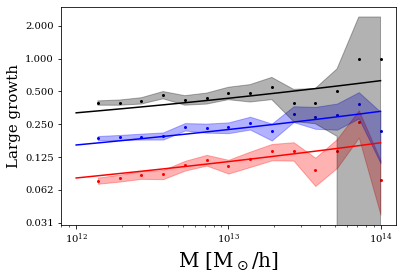

In [19]:
zfs = [0.05, 0.55, 1.5]
nbins = 15
masses = np.logspace(12, 14, nbins)
colors = ['red', 'blue', 'black']
sim_name = 'Bolshoi'
path = '/home/painchess/YubaHDD6T/oldsims/'

simtest = sm.Simulation(sim_name, sims[sim_name][0], sims[sim_name][1], path=path)

om = simtest.om0
s8 = simtest.sig8
for k in range(len(zfs)):
    zf = zfs[k]
    res_sim, ntot_sim, ps_sim = simtest.large_growth(zf, mbins=15)
    zs, dz = sm.get_zlastdyn(zf, om=om, h=0.7, zbins=20)
    res1_ana = sm.large_growth_analytical(masses, zs, s8=s8, om=om)
    plt.plot(masses, res1_ana, color=colors[k], label='z = {:1.2f} Analytical'.format(zf))
    plt.fill_between(masses[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:], color = colors[k],  alpha=0.3)

    plt.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], s=4, color=colors[k])
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, numticks=10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=2, numticks=10))

plt.ylabel('Large growth', size=15)
plt.xlabel(r'M [M$_\odot$/h]', size=20)


## All simulations

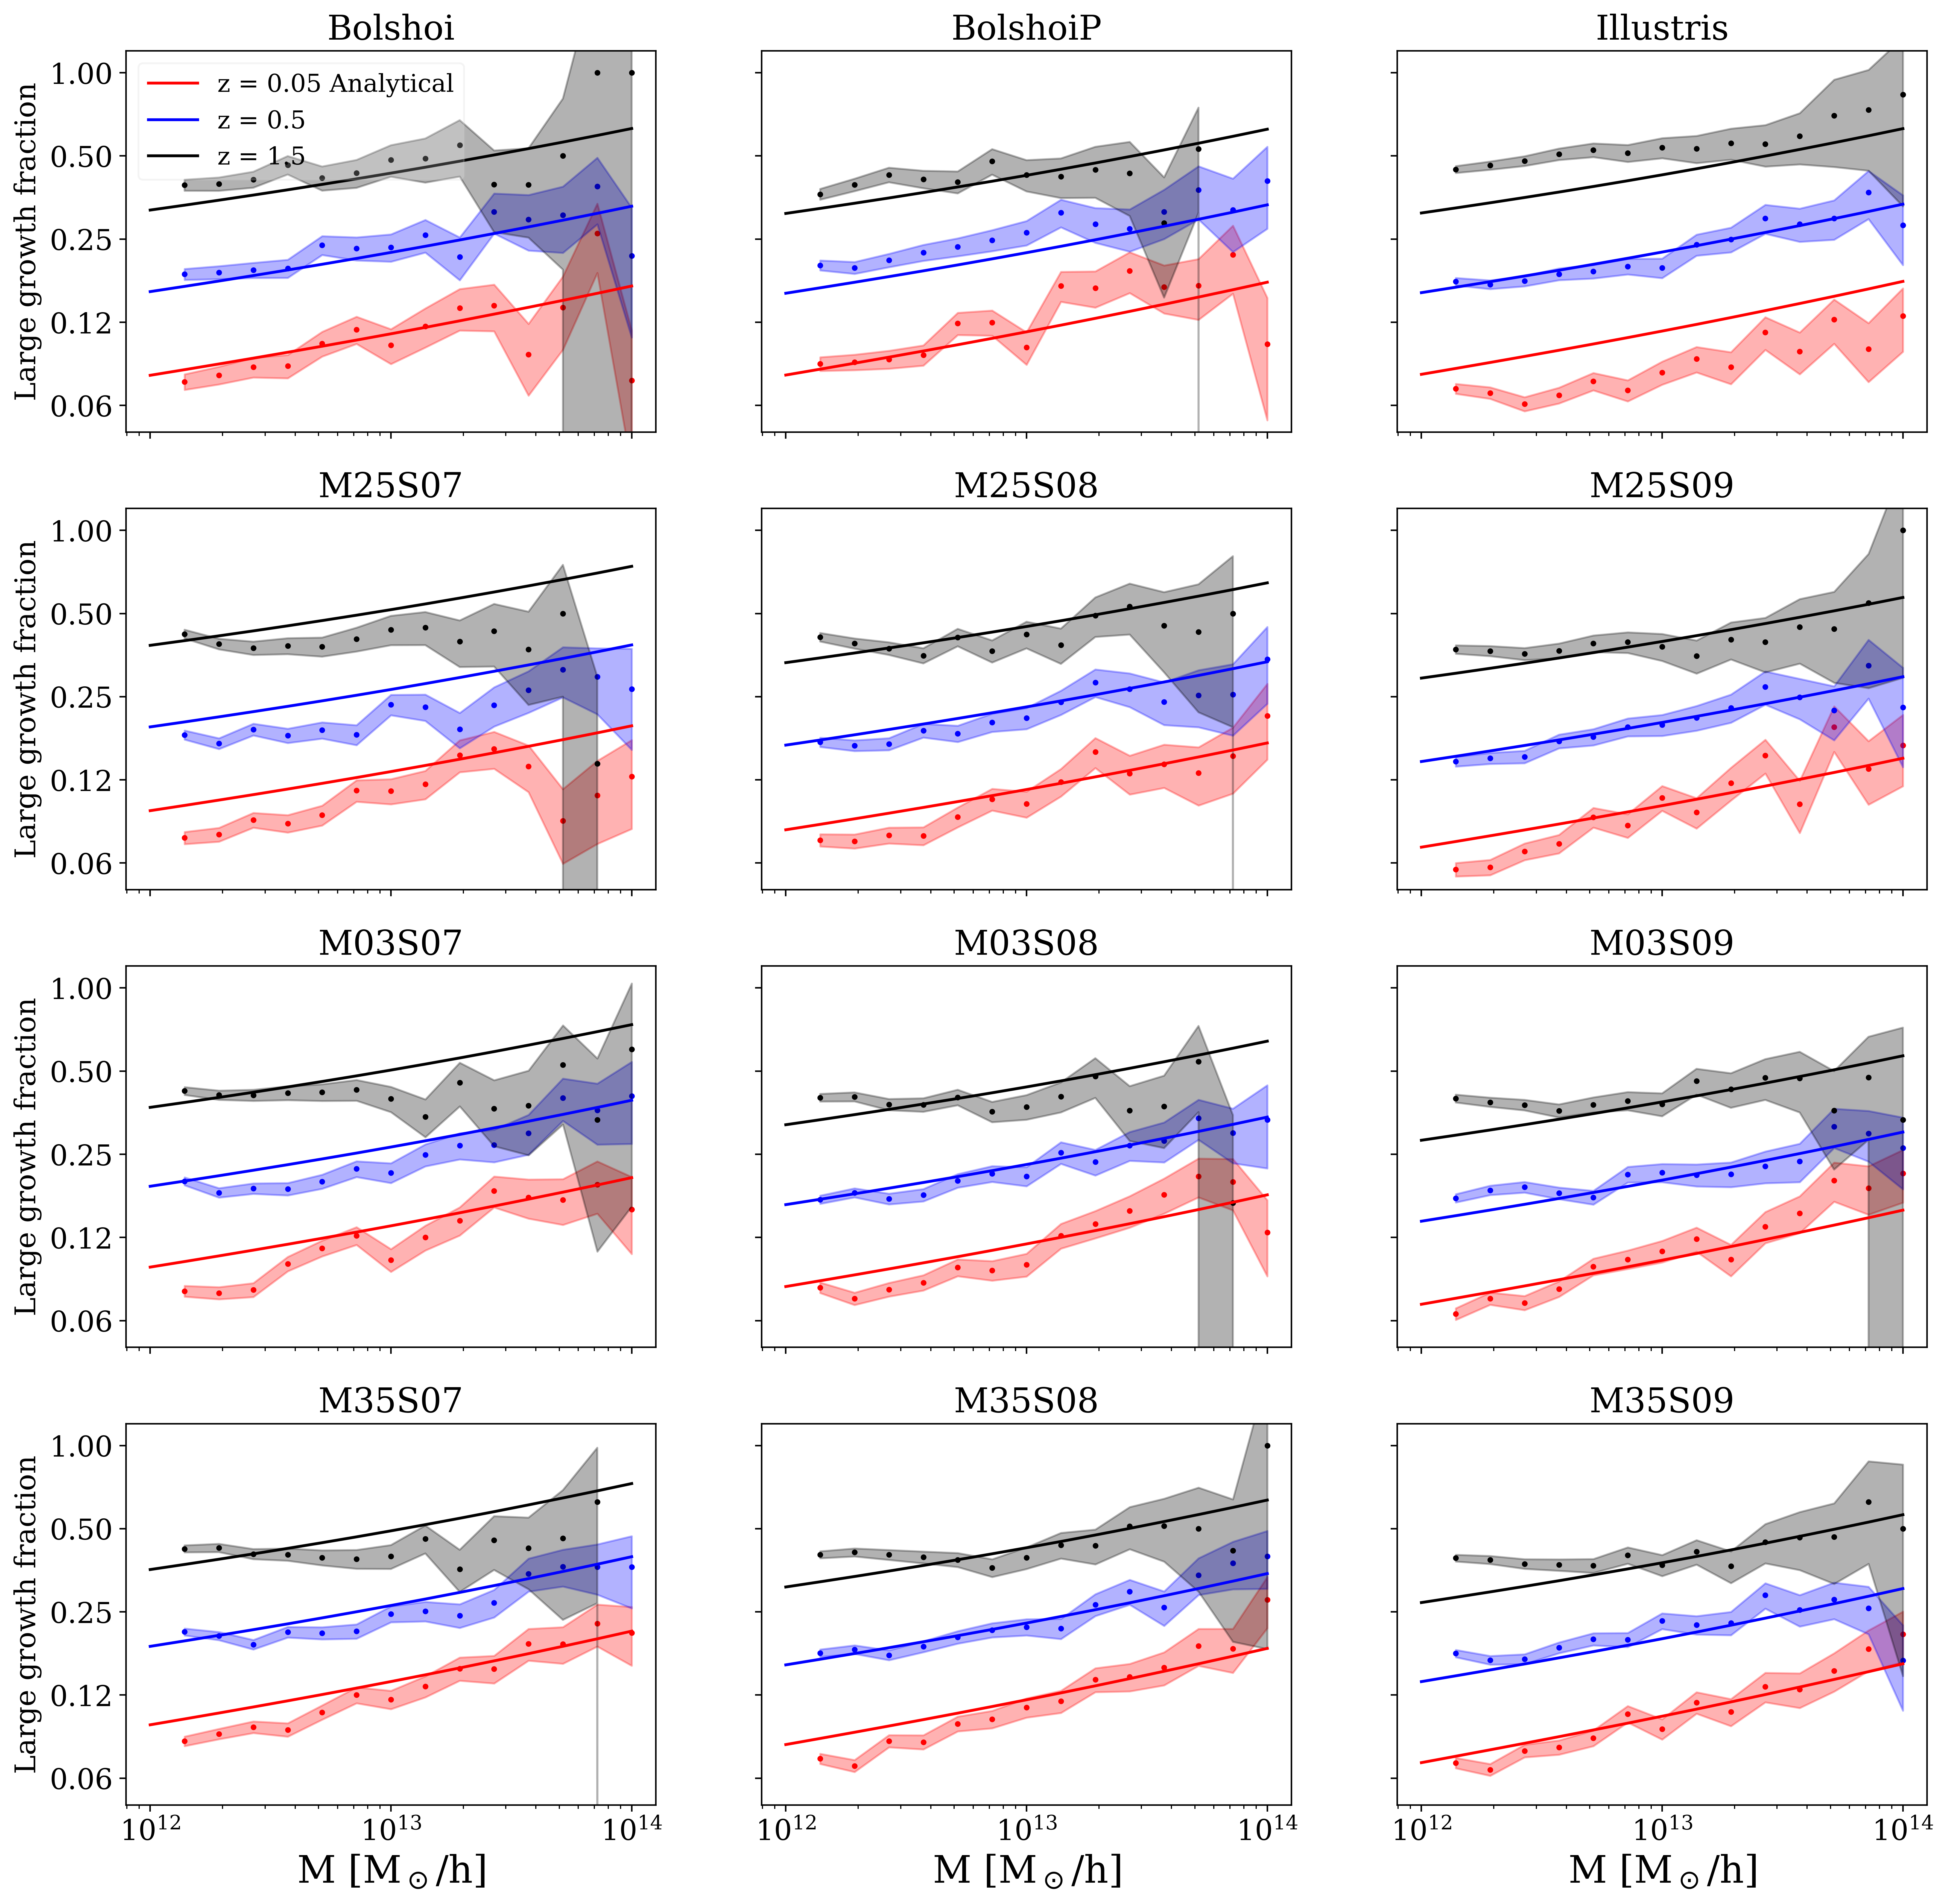

In [9]:
zfs = [0.05, 0.55, 1.5]
nbins = 15
masses = np.logspace(12, 14, nbins)
simnames = ['Bolshoi','BolshoiP','Illustris', 'M25S07', 'M25S08', 'M25S09','M03S07','M03S08','M03S09', 'M35S07', 'M35S08','M35S09']
colors = ['red', 'blue', 'black']
path = '/home/painchess/YubaHDD6T/oldsims/'
fig, axs = plt.subplots(4, 3,  figsize=[17, 17], dpi=500, sharex=True, sharey=True)
save = False
resplot1, resplot2 = [], []
for i in range(len(simnames)):
    sim = simnames[i]
    simt = sm.Simulation(sim, sims[sim][0], sims[sim][1], path)
    ax = axs[i // 3, i % 3]
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    for k in range(len(zfs)):
        zf = zfs[k]
        res_sim, ntot_sim, ps_sim = simt.large_growth(zf, mbins=15, save=False)
        zs, dz = sm.get_zlastdyn(zf, h=0.7, om=simt.om0, zbins=20)
        res1_ana = sm.large_growth_analytical(masses, zs, s8=simt.sig8, om=simt.om0)

        resplot1.append([masses, res1_ana])
        resplot2.append([masses[1:], res_sim[1:]/ntot_sim[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:]])

        if zf == 0.05:
            ax.plot(masses, res1_ana, color=colors[k], label='z = {:1.2f} Analytical'.format(zf)[:19*(i==0)])
            #ax.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], s=4, color=colors[k], label=' {}'.format(prefixes[sim]))
            ax.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], s=4, color=colors[k])
            ax.fill_between(masses[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:], color = colors[k],  alpha=0.3)
            #ax.text(8e12, 0.9, sim)
            ax.set_title(sim, size=18)
        else:
            ax.plot(masses, res1_ana, color=colors[k], label='z = {:1.2f}'.format(zf)[:7*(i==0)])
            ax.scatter(masses[1:], res_sim[1:]/ntot_sim[1:], color=colors[k], s=4)
            ax.fill_between(masses[1:], (res_sim[1:]-ps_sim[1:])/ntot_sim[1:], (res_sim[1:]+ps_sim[1:])/ntot_sim[1:], color = colors[k], alpha=0.3)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if i>8:
        ax.set_xlabel(r'M [M$_\odot$/h]', size=20)
    ax.set_ylim(0.05, 1.2)
    ax.set_ylabel('Large growth fraction'[:23*(i%3 == 0)], size=15)

axs[0,0].legend(framealpha=0.2)

#ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%1.2f'))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, numticks=10))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))

ax.yaxis.set_major_locator(ticker.LogLocator(base=2, numticks=10))
   

np.save('./data/resplot1_fig_nlarge_growth_vs_M_wsims_all_nbins{}.npy'.format(nbins), np.array(resplot1, dtype=object))
np.save('./data/resplot2_fig_nlarge_growth_vs_M_wsims_all_nbins{}.npy'.format(nbins), np.array(resplot2, dtype=object))
    
plt.savefig('./figs/lognlarge_growth_vs_M_wsims_all_nbins_{}.pdf'.format(nbins), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.savefig('./figs/lognlarge_growth_vs_M_wsims_all_nbins_{}.png'.format(nbins), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
